Que.5

In Churn.csv dataset you have to predict that customer is exited or not based on various factors given in dataset.
Implement a KNN,SVM and Naive Bayes model and calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.

In [1]:
import warnings 
warnings.filterwarnings(action="ignore")

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("Churn.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop('Surname', axis=1, inplace=True)

In [6]:
# label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [11]:
# Basic info
print(df.info())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Preview data
print("\nHead of dataset:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB
None

Missing values:
 RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0

In [12]:
# Remove duplicate rows
df = df.drop_duplicates()


In [13]:
# Fill missing categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
# Convert date column to datetime
if()
df['your_date_column'] = pd.to_datetime(df['your_date_column'])


KeyError: 'your_date_column'

In [15]:
# Strip spaces, make lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [16]:
# Shape of dataset
print("Shape:", df.shape)

# Info about columns
print("\nInfo:")
print(df.info())

# Summary statistics
print("\nDescribe:")
print(df.describe(include='all'))


Shape: (10000, 13)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  int64  
 4   gender           10000 non-null  int64  
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  int64  
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB
None

Describe:
         rownumber    customerid   creditscore     geography        gender  \
count  10000.00000  1.000000

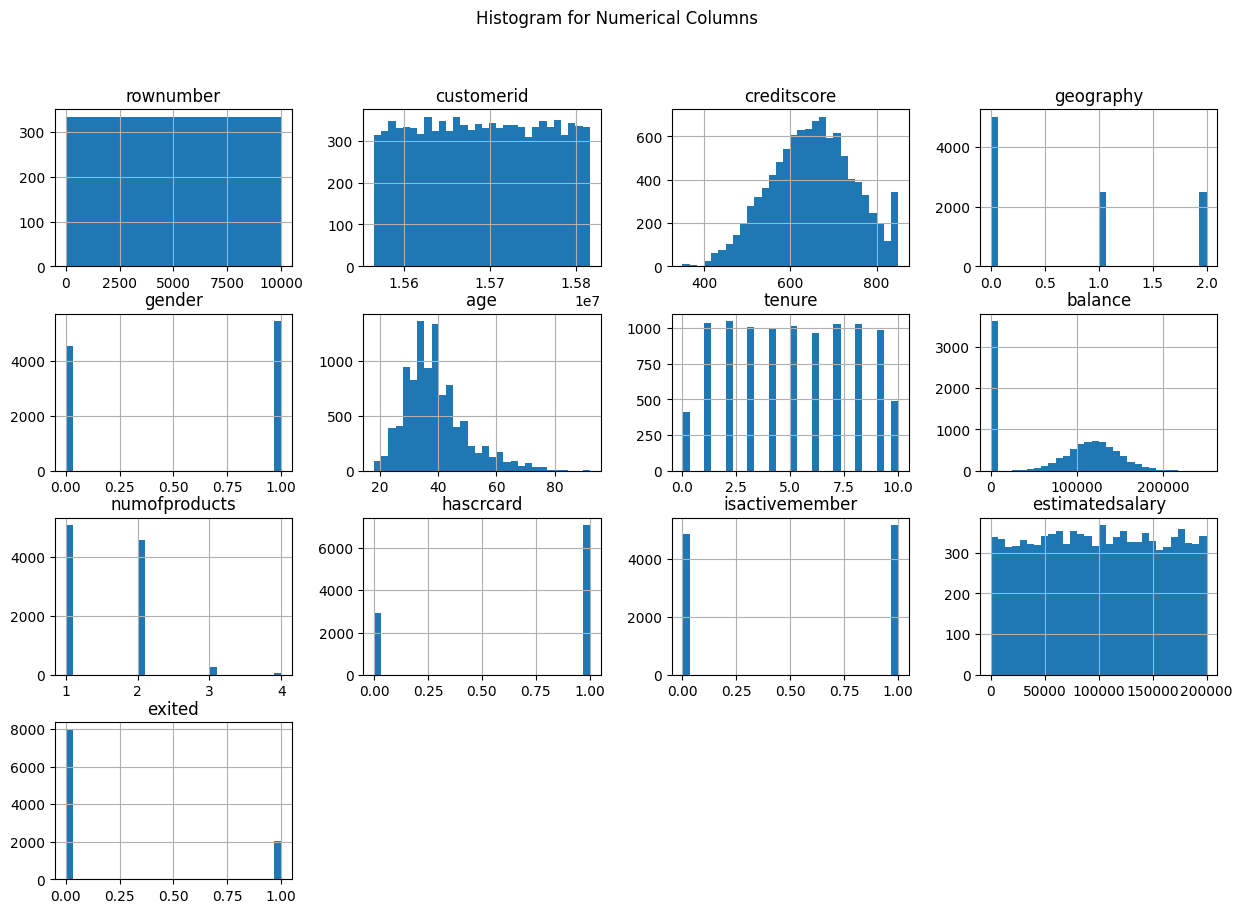

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram for Numerical Columns")
plt.show()

# Plot for categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()


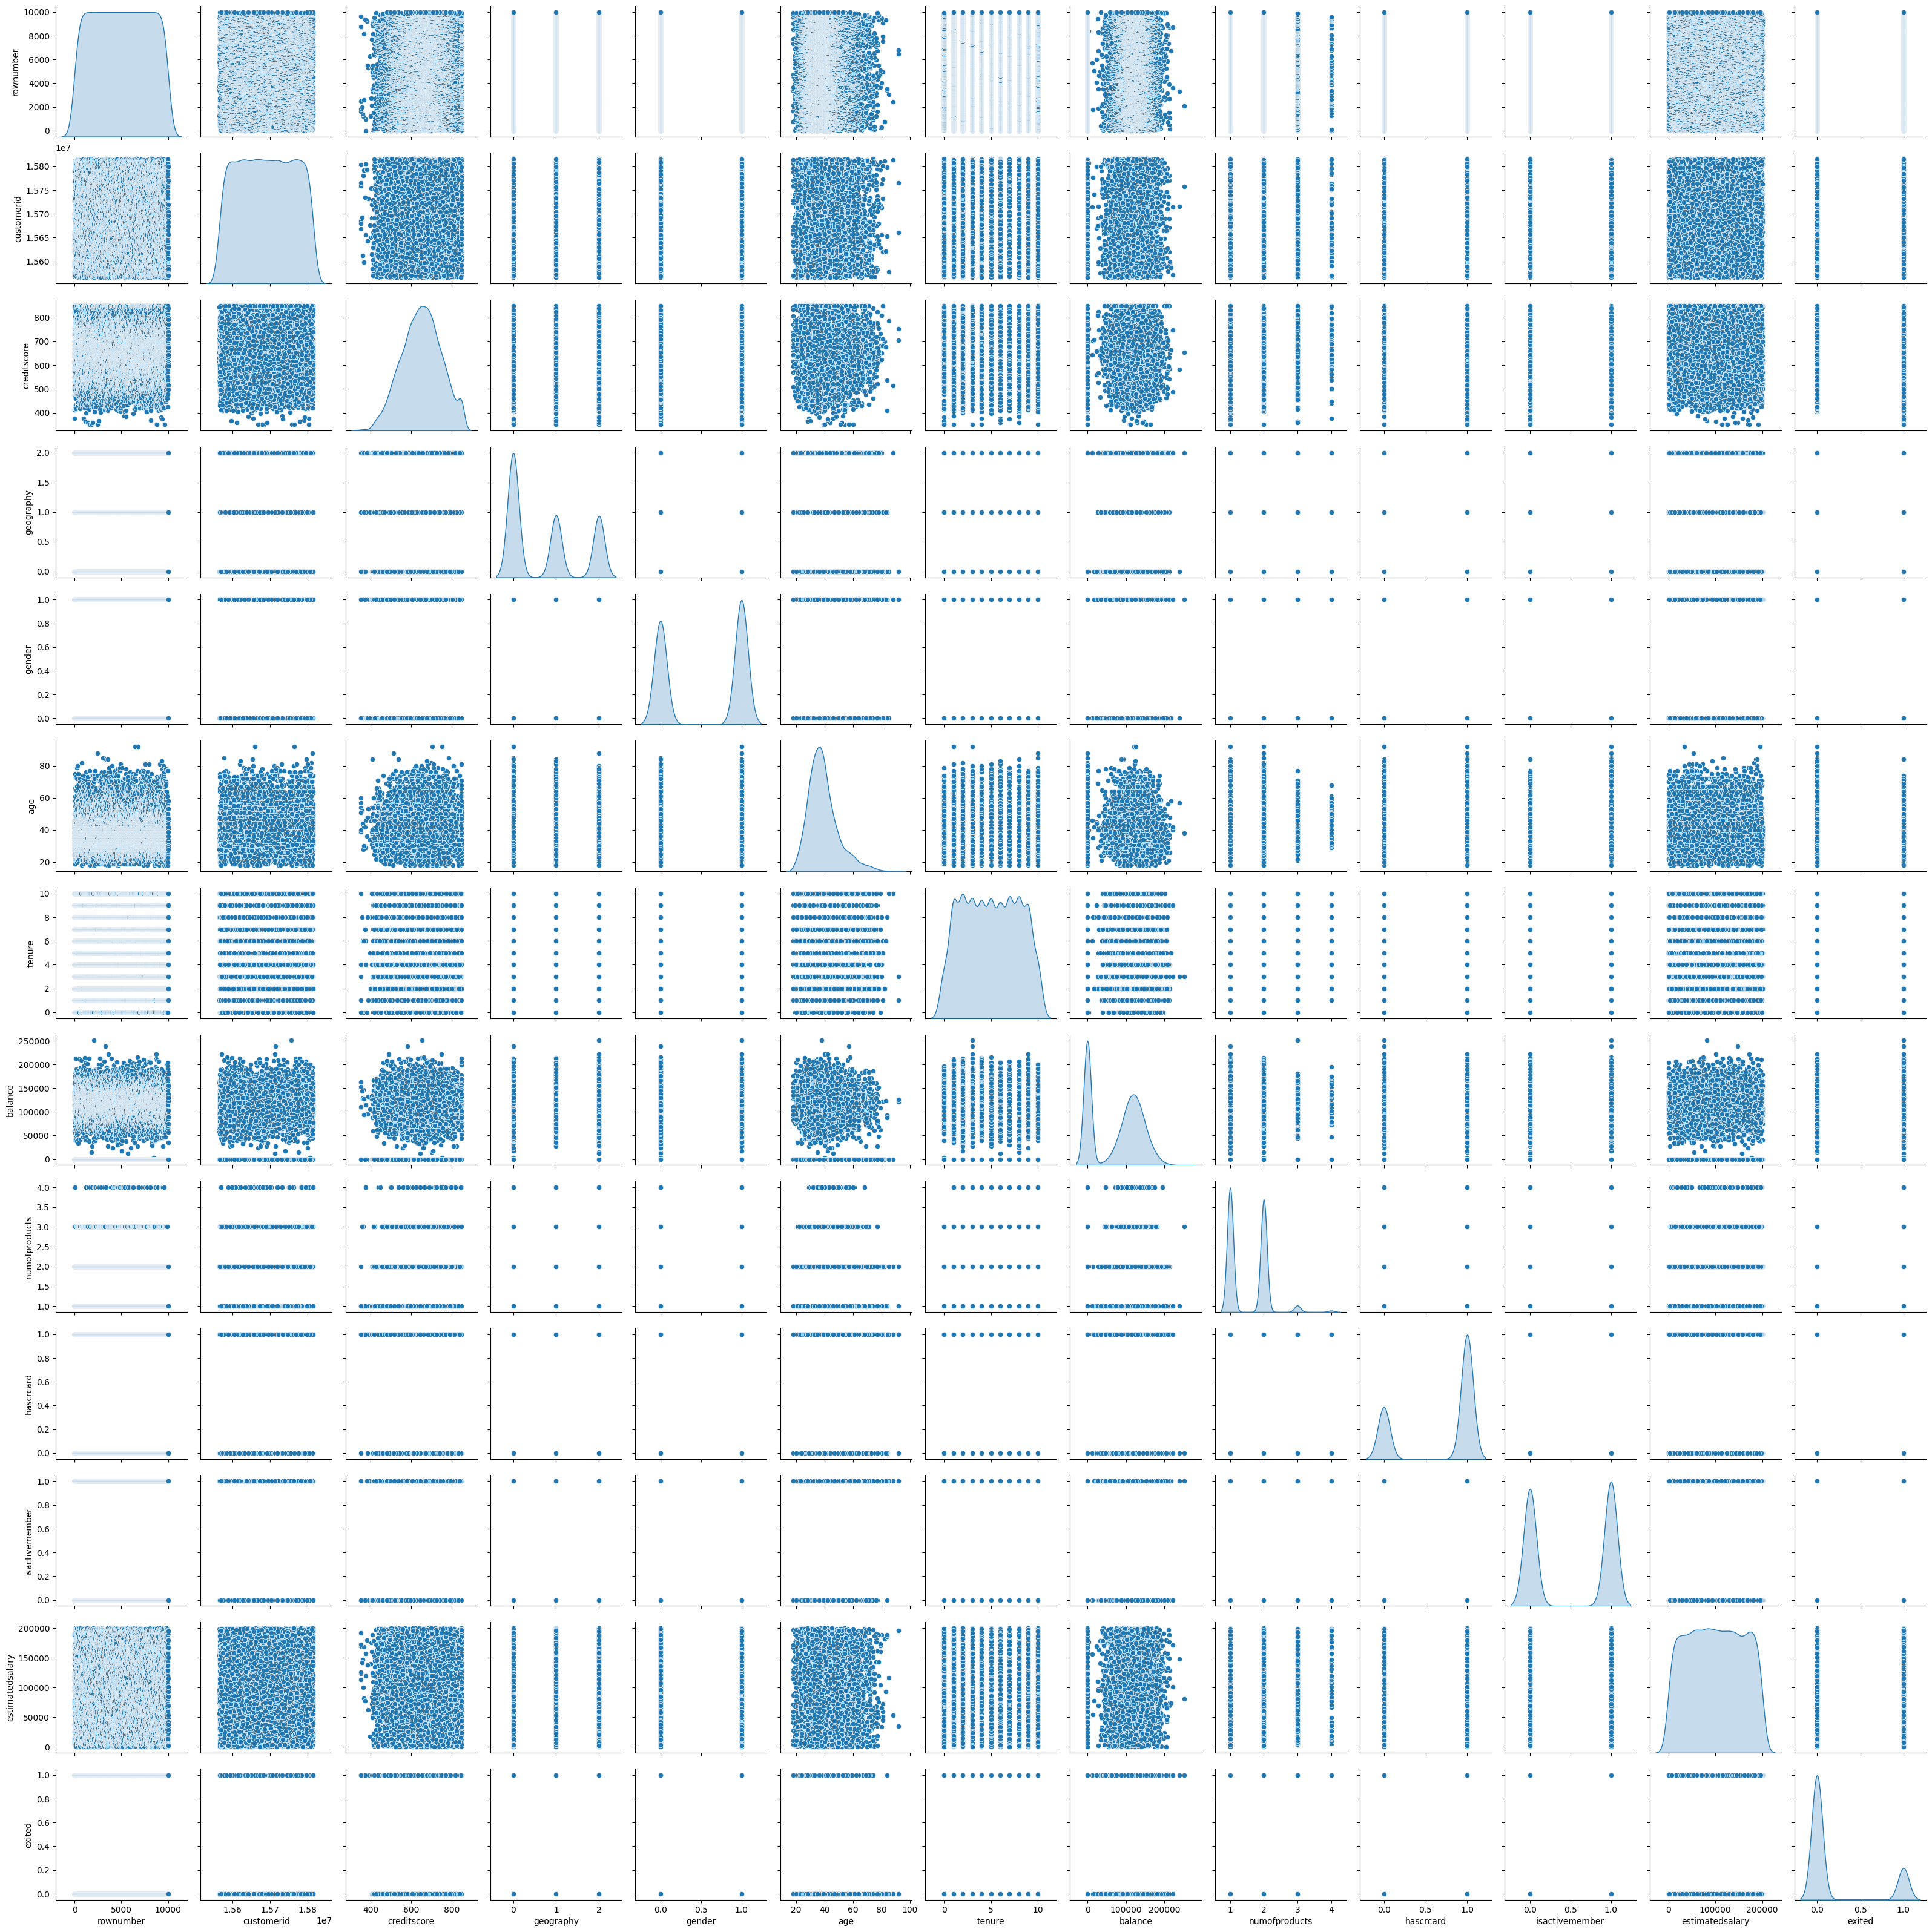

In [18]:
# Numerical vs target
sns.pairplot(df, diag_kind='kde')  # if small dataset
plt.show()

# Categorical vs target
# sns.boxplot(x='target_column', y='numerical_column', data=df)
# sns.barplot(x='categorical_column', y='target_column', data=df)


In [19]:
df.corr()

,rownumber,customerid,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
rownumber,1.000000,0.004202,0.005840,-0.010358,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
customerid,0.004202,1.000000,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
creditscore,0.005840,0.005308,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
geography,-0.010358,0.006516,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
gender,0.018196,-0.002641,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,0.000783,0.009497,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.006495,-0.014883,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.009067,-0.012419,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.007246,0.016972,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,0.000599,-0.014025,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138


### Feature Engineering

In [21]:
df.drop(['rownumber', 'customerid'], axis=1, inplace=True)


In [23]:
df['gendergender'] = df['gender'].map({'Male': 1, 'Female': 0})


In [25]:
df = pd.get_dummies(df, columns=['geography'], drop_first=True)


In [26]:
print(df.head())


   creditscore  gender  age  tenure    balance  numofproducts  hascrcard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   isactivemember  estimatedsalary  exited  gendergender  geography_1  \
0               1        101348.88       1           NaN        False   
1               1        112542.58       0           NaN        False   
2               0        113931.57       1           NaN        False   
3               0         93826.63       0           NaN        False   
4               1         79084.10       0           NaN        False   

   geography_2  
0        False  
1         True  
2        False  
3        False  
4         True  


In [28]:
# Drop unexpected or incorrectly named columns
df.drop(columns=['gendergender'], errors='ignore', inplace=True)

# Re-do correct one-hot encoding for 'Geography'
df = pd.get_dummies(df, columns=['geography_1'], drop_first=True)


In [29]:
print(df.columns)


Index(['creditscore', 'gender', 'age', 'tenure', 'balance', 'numofproducts',
       'hascrcard', 'isactivemember', 'estimatedsalary', 'exited',
       'geography_2', 'geography_1_True'],
      dtype='object')


In [30]:
# Features (X) and target (y)
X = df.drop('exited', axis=1)
y = df['exited']


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123456, 
                                                    )  # maintain class balance


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors if needed
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate KNN model
print("KNN Performance Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Performance Evaluation
Accuracy: 0.753
Precision: 0.2116788321167883
Recall: 0.06987951807228916
F1 Score: 0.10507246376811594
Confusion Matrix:
 [[1477  108]
 [ 386   29]]


In [33]:
from sklearn.svm import SVC

# Create the SVM model
svm = SVC(kernel='linear')  # You can try other kernels like 'rbf'
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate SVM model
print("SVM Performance Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Performance Evaluation
Accuracy: 0.7775
Precision: 0.23214285714285715
Recall: 0.03132530120481928
F1 Score: 0.055201698513800426
Confusion Matrix:
 [[1542   43]
 [ 402   13]]


In [34]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Evaluate Naive Bayes model
print("Naive Bayes Performance Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Performance Evaluation
Accuracy: 0.789
Precision: 0.44776119402985076
Recall: 0.07228915662650602
F1 Score: 0.12448132780082988
Confusion Matrix:
 [[1548   37]
 [ 385   30]]
